<h2>Multiple faces of correlation in isobaric labeling-based proteomics</h2>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
sns.set_palette('muted')

In [2]:
def rename_abund_columns(dfIn):
    '''Adapted for Peptide Groups table'''
    renaming_dict = {}
    for c in dfIn.columns:
        if 'Abundances Normalized' in c:
            new_name = c.split('Sample ')[-1]
            new_name = new_name.split('_')[0]
            renaming_dict[c] = new_name
    dfOut = dfIn.rename(renaming_dict,axis='columns')
    return dfOut

<h3>Import and clean up the data</h3>

The isobaric labeling LC-MS data was processed using the vendor software that produces a bunch of tab-delimited text files. [The LC-MS data is available](https://www.ebi.ac.uk/pride/archive/projects/PXD005236) through the ProteomeXChange repository. You can find the Proteins file in [the Github repo](https://github.com/dev-ev/prot-rna-umap-clustering/tree/main/Prot_Data).

In [3]:
df = pd.read_csv(
    os.getcwd() + '/Prot_Data/Ecoli_Isobaric_Abundances_Proteins.txt',
    sep='\t'
)
print(df.shape)
df = rename_abund_columns(df)
print(df.columns)
df.head(3)

(1907, 39)
Index(['Proteins Unique Sequence ID', 'Checked',
       'Protein FDR Confidence Combined', 'Master', 'Accession', 'Description',
       'Exp q-value Combined', 'Sum PEP Score', 'Coverage in Percent',
       'Number of Peptides', 'Number of PSMs', 'Number of Unique Peptides',
       'Number of AAs', 'MW in kDa', 'calc pI', 'Score Mascot Mascot',
       'Number of Peptides by Search Engine Mascot', 'S01', 'S02', 'S03',
       'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10',
       'Found in Sample in S1 F1 126 Sample S01_WT',
       'Found in Sample in S2 F1 127N Sample S02_WT',
       'Found in Sample in S5 F1 128C Sample S03_ORF',
       'Found in Sample in S6 F1 129N Sample S04_ORF',
       'Found in Sample in S9 F1 130C Sample S05_ORF_IPTG',
       'Found in Sample in S8 F1 130N Sample S06_ORF_IPTG',
       'Found in Sample in S10 F1 131 Sample S07_SVI',
       'Found in Sample in S7 F1 129C Sample S08_SVI',
       'Found in Sample in S3 F1 127C Sample S09_SVI_IPTG',
     

,Proteins Unique Sequence ID,Checked,Protein FDR Confidence Combined,Master,Accession,Description,Exp q-value Combined,Sum PEP Score,Coverage in Percent,Number of Peptides,...,Found in Sample in S5 F1 128C Sample S03_ORF,Found in Sample in S6 F1 129N Sample S04_ORF,Found in Sample in S9 F1 130C Sample S05_ORF_IPTG,Found in Sample in S8 F1 130N Sample S06_ORF_IPTG,Found in Sample in S10 F1 131 Sample S07_SVI,Found in Sample in S7 F1 129C Sample S08_SVI,Found in Sample in S3 F1 127C Sample S09_SVI_IPTG,Found in Sample in S4 F1 128N Sample S10_SVI_IPTG,Number of Protein Groups,Modifications
0,-6470576087907012396,False,High,IsMasterProtein,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,0.0,205.071,72,22,...,High,High,High,High,High,High,High,High,1,Methylthio [C82; C256]
1,-7437387922365295229,False,High,IsMasterProtein,P25665,5-methyltetrahydropteroyltriglutamate--homocys...,0.0,209.247,32,29,...,High,High,High,High,High,High,High,High,1,Methylthio [C353; C726]
2,9130678767359811654,False,High,IsMasterProtein,P0A6F5,60 kDa chaperonin OS=Escherichia coli (strain ...,0.0,226.099,53,26,...,High,High,High,High,High,High,High,High,1,Methylthio [C138; C458]


In [4]:
df['Protein FDR Confidence Combined'].unique()

array(['High', 'Medium'], dtype=object)

In [5]:
df['Master'].unique()

array(['IsMasterProtein'], dtype=object)

In [6]:
df[
    df['Accession'].str.contains('cont')
].shape

(11, 39)

Filter out the contaminant proteins that don't belong to <i>E coli</i>

In [7]:
df = df[ ~df['Accession'].str.contains('cont') ]
print(df.shape)
df.head(3)

(1896, 39)


,Proteins Unique Sequence ID,Checked,Protein FDR Confidence Combined,Master,Accession,Description,Exp q-value Combined,Sum PEP Score,Coverage in Percent,Number of Peptides,...,Found in Sample in S5 F1 128C Sample S03_ORF,Found in Sample in S6 F1 129N Sample S04_ORF,Found in Sample in S9 F1 130C Sample S05_ORF_IPTG,Found in Sample in S8 F1 130N Sample S06_ORF_IPTG,Found in Sample in S10 F1 131 Sample S07_SVI,Found in Sample in S7 F1 129C Sample S08_SVI,Found in Sample in S3 F1 127C Sample S09_SVI_IPTG,Found in Sample in S4 F1 128N Sample S10_SVI_IPTG,Number of Protein Groups,Modifications
0,-6470576087907012396,False,High,IsMasterProtein,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,0.0,205.071,72,22,...,High,High,High,High,High,High,High,High,1,Methylthio [C82; C256]
1,-7437387922365295229,False,High,IsMasterProtein,P25665,5-methyltetrahydropteroyltriglutamate--homocys...,0.0,209.247,32,29,...,High,High,High,High,High,High,High,High,1,Methylthio [C353; C726]
2,9130678767359811654,False,High,IsMasterProtein,P0A6F5,60 kDa chaperonin OS=Escherichia coli (strain ...,0.0,226.099,53,26,...,High,High,High,High,High,High,High,High,1,Methylthio [C138; C458]


Uniprot Accessions are unique identifiers in this data set, why not use them as row indices

In [8]:
df.set_index('Accession', inplace = True)
df.head(3)

,Proteins Unique Sequence ID,Checked,Protein FDR Confidence Combined,Master,Description,Exp q-value Combined,Sum PEP Score,Coverage in Percent,Number of Peptides,Number of PSMs,...,Found in Sample in S5 F1 128C Sample S03_ORF,Found in Sample in S6 F1 129N Sample S04_ORF,Found in Sample in S9 F1 130C Sample S05_ORF_IPTG,Found in Sample in S8 F1 130N Sample S06_ORF_IPTG,Found in Sample in S10 F1 131 Sample S07_SVI,Found in Sample in S7 F1 129C Sample S08_SVI,Found in Sample in S3 F1 127C Sample S09_SVI_IPTG,Found in Sample in S4 F1 128N Sample S10_SVI_IPTG,Number of Protein Groups,Modifications
Accession,,,,,,,,,,,,,,,,,,,,,
P0CE48,-6470576087907012396,False,High,IsMasterProtein,Elongation factor Tu 2 OS=Escherichia coli (st...,0.0,205.071,72,22,629,...,High,High,High,High,High,High,High,High,1,Methylthio [C82; C256]
P25665,-7437387922365295229,False,High,IsMasterProtein,5-methyltetrahydropteroyltriglutamate--homocys...,0.0,209.247,32,29,370,...,High,High,High,High,High,High,High,High,1,Methylthio [C353; C726]
P0A6F5,9130678767359811654,False,High,IsMasterProtein,60 kDa chaperonin OS=Escherichia coli (strain ...,0.0,226.099,53,26,351,...,High,High,High,High,High,High,High,High,1,Methylthio [C138; C458]


Select the numeric values

In [9]:
dfNum = df[
    ['S01', 'S02', 'S03', 'S04', 'S05',
     'S06', 'S07', 'S08', 'S09', 'S10']
].dropna(axis = 'rows').copy()
print(dfNum.shape)
dfLog = np.log10( dfNum )
dfLog.head(3)

(1836, 10)


,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
Accession,,,,,,,,,,
P0CE48,4.829582,4.836120,4.837522,4.824708,4.814122,4.781948,4.844077,4.834477,4.838981,4.834636
P25665,4.093180,4.123313,4.839153,4.892407,5.178435,5.300502,4.403879,4.421168,4.703725,4.819772
P0A6F5,4.733622,4.740544,4.789047,4.732888,4.875395,4.787679,4.804792,4.793324,4.809140,4.801497


In [10]:
dfLog.tail(3)

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
Accession,,,,,,,,,,
P00936,1.924279,1.868056,1.913814,1.943495,1.897627,1.946943,1.965672,1.847573,1.965672,1.972203
P0ADW8,1.549003,1.675778,1.677607,1.591065,1.658011,1.572872,1.646404,1.683047,1.580925,1.622214
P0ADX9,2.111599,2.083861,2.083144,2.094471,2.064832,2.056905,2.075547,2.054230,2.123852,2.042576


Text(0.5, 0.98, 'Log10 Abundances')

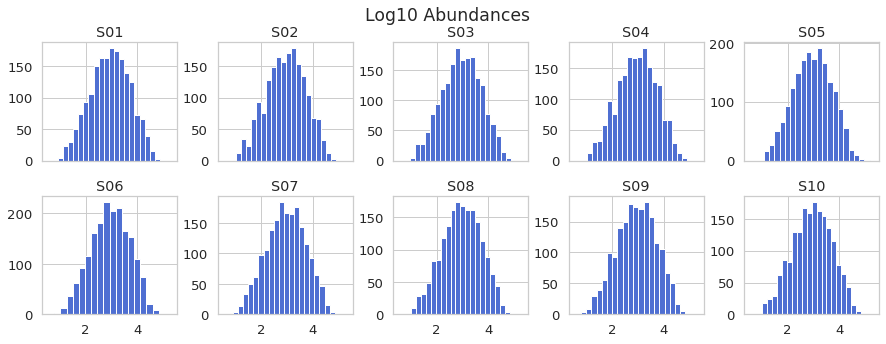

In [11]:
#dfLog.hist(color = '#4a966b', bins = 20,
#           layout = (2, 5), figsize = (15, 5),
#           sharex = True)
dfLog.hist(color = '#4f6fd2', bins = 20,
           layout = (2, 5), figsize = (15, 5),
           sharex = True)
plt.suptitle('Log10 Abundances')

Text(0.5, 1.0, 'Log10 Normalized Signal Abundances')

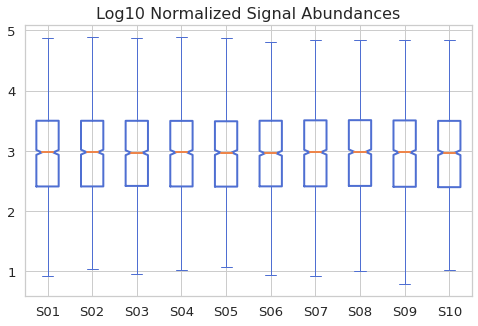

In [12]:
c = '#4f6fd2'
dfLog.boxplot(
    figsize = (8, 5),
    notch = True, showmeans = False, vert = True,
    showfliers = False,
    boxprops = dict(linewidth = 2, color = c),
    whiskerprops = dict(linewidth = 1, color = c),
    capprops = dict(linewidth = 1, color = c),
    medianprops= dict(linewidth = 2)
)
plt.title('Log10 Normalized Signal Abundances', fontsize = 16)
#plt.grid(b=None)

In [27]:
dfNum.sum()

S01    5811523.8
S02    5862298.2
S03    5874726.5
S04    5860730.2
S05    5869558.6
S06    5861308.9
S07    5840258.7
S08    5835512.5
S09    5828791.2
S10    5830477.7
dtype: float64

In [28]:
dfLog.sum()

S01    5407.358507
S02    5415.529107
S03    5421.951839
S04    5413.545848
S05    5420.977531
S06    5410.352606
S07    5424.180405
S08    5425.054158
S09    5399.895850
S10    5405.012957
dtype: float64

In [13]:
dfLog.mean()

S01    2.945184
S02    2.949635
S03    2.953133
S04    2.948554
S05    2.952602
S06    2.946815
S07    2.954347
S08    2.954823
S09    2.941120
S10    2.943907
dtype: float64

<h3>Look at protein-protein correlations</h3>

/home/trainee/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


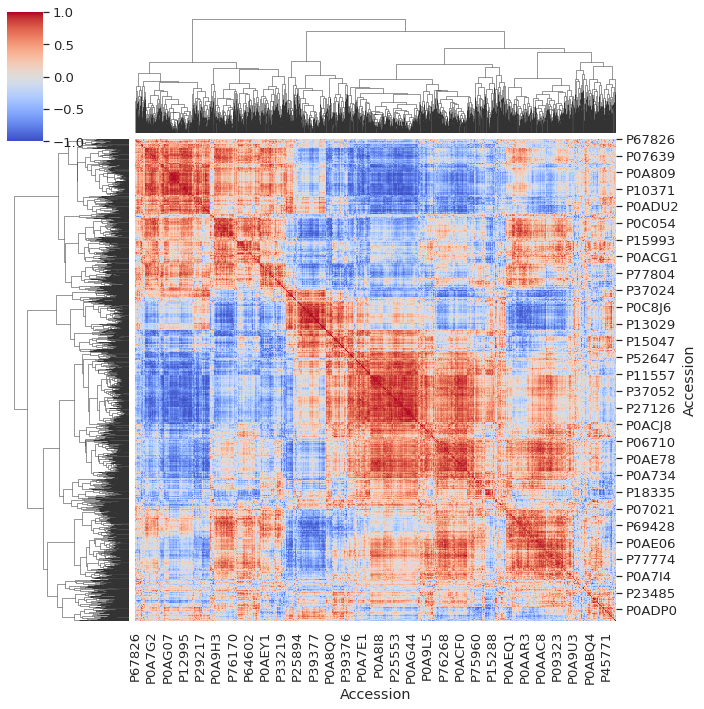

In [14]:
sns.clustermap(
    dfLog.T.corr(method='pearson'),
    figsize=(10,10),
    cmap='coolwarm', vmin=-1, vmax=1,
    annot=False, cbar=True, linewidth=0
)

Select upper triangle of the correlaion matrix, exclude the diagonal and flatten the array.

In [15]:
corrArray = dfLog.T.corr(method='pearson').to_numpy()
corrArray = corrArray[
    np.triu_indices( corrArray.shape[0], k = 1)
]
print( len(corrArray) )
corrArray

1684530


array([-0.67298384, -0.12168567, -0.4087866 , ..., -0.61380751,
        0.17361366, -0.45789386])

Text(0.5, 1.0, 'Protein-Protein Correlations (Normalized Abundances)')

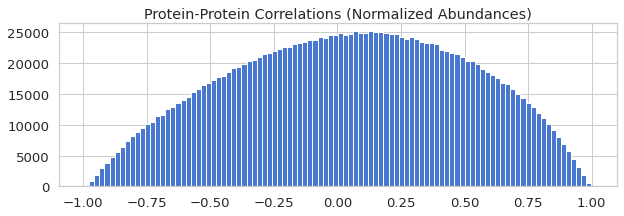

In [16]:
f = plt.figure(figsize=(10,3))
plt.hist(corrArray, bins=100)
plt.title('Protein-Protein Correlations (Normalized Abundances)')

In [17]:
pd.DataFrame(corrArray).describe()

,0
count,1.684530e+06
mean,4.455675e-02
std,4.514530e-01
min,-9.955114e-01
25%,-3.033891e-01
50%,5.611544e-02
75%,4.002236e-01
max,9.991408e-01


Create the data set with the averaged biological replicates, and see how the distribution of the correlations change

In [20]:
def add_group_averages(df, groups):
    df = df.copy()
    for g in groups:
        group = np.array(df[groups[g]])
        averages = np.nanmean(group, axis=1)
        df[('AVG '+g)] = averages
    return df

In [21]:
groups = {
    'Control': ['S01', 'S02'],
    'Condition 1': ['S03', 'S04'], 'Condition 2': ['S05', 'S06'],
    'Condition 3': ['S07', 'S08'], 'Condition 4': ['S09', 'S10']
}
dfAvg = add_group_averages(dfNum, groups)
dfAvg = np.log10(dfAvg)
dfAvg.head(3)

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,AVG Control,AVG Condition 1,AVG Condition 2,AVG Condition 3,AVG Condition 4
Accession,,,,,,,,,,,,,,,
P0CE48,4.829582,4.836120,4.837522,4.824708,4.814122,4.781948,4.844077,4.834477,4.838981,4.834636,4.832864,4.831162,4.798333,4.839304,4.836814
P25665,4.093180,4.123313,4.839153,4.892407,5.178435,5.300502,4.403879,4.421168,4.703725,4.819772,4.108508,4.866596,5.243743,4.412609,4.765613
P0A6F5,4.733622,4.740544,4.789047,4.732888,4.875395,4.787679,4.804792,4.793324,4.809140,4.801497,4.737097,4.761874,4.833747,4.799096,4.805335


Seems correct. Let's go ahead and see the disctribution of correlations on the average vals.

/home/trainee/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


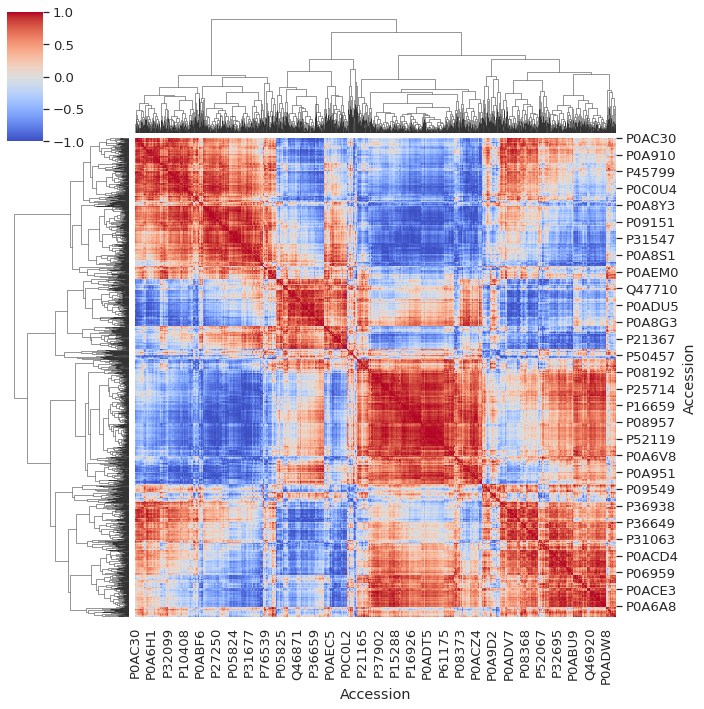

In [26]:
sns.clustermap(
    dfAvg.iloc[: , -5:].T.corr(method='pearson'),
    figsize=(10,10),
    cmap='coolwarm', vmin=-1, vmax=1,
    annot=False, cbar=True, linewidth=0
)

1684530


Text(0.5, 1.0, 'Protein-Protein Correlations (Averaged Biological Conditions)')

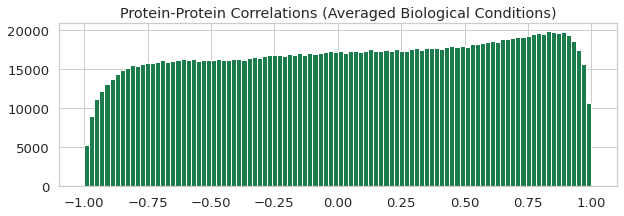

In [25]:
corrArray = dfAvg.iloc[: , -5:].T.corr(method='pearson').to_numpy()
corrArray = corrArray[
    np.triu_indices( corrArray.shape[0], k = 1)
]
print( len(corrArray) )
f = plt.figure(figsize=(10,3))
plt.hist(corrArray, bins=100, color = '#1b7c4c')
plt.title('Protein-Protein Correlations (Averaged Biological Conditions)')

In [23]:
dfAvg.iloc[: , -5:].T

Accession,P0CE48,P25665,P0A6F5,P0A910,P0A6M8,P0A9B2,P0A9G6,P03023,P0A850,P0A8V2,...,P0A6H8,P76113,P0A8T1,P0ADP2,P76223,P76389,P0ACS9,P00936,P0ADW8,P0ADX9
AVG Control,4.832864,4.108508,4.737097,4.620996,4.642355,4.881658,4.504070,4.497547,4.577025,4.659485,...,2.198245,2.778151,2.135610,2.049993,1.528274,1.613842,2.061075,1.897077,1.617000,2.097951
AVG Condition 1,4.831162,4.866596,4.761874,4.619153,4.635150,4.865968,4.467957,4.534390,4.562292,4.661681,...,2.202761,2.790356,2.127914,2.067257,1.482159,1.638988,2.045714,1.928908,1.636488,2.088845
AVG Condition 2,4.798333,5.243743,4.833747,4.641511,4.555951,4.833436,4.603456,4.637228,4.515220,4.619712,...,2.194514,2.886604,2.115444,2.073535,1.518514,1.643946,2.002814,1.922985,1.617525,2.060887
AVG Condition 3,4.839304,4.412609,4.799096,4.538846,4.628498,4.836633,4.564399,4.471606,4.540478,4.653036,...,2.181415,2.861146,2.161218,2.037825,1.524396,1.522444,2.008387,1.910624,1.665112,2.065019
AVG Condition 4,4.836814,4.765613,4.805335,4.553772,4.625204,4.821347,4.589339,4.484785,4.530448,4.648368,...,2.173332,2.847202,2.116774,1.990783,1.418301,1.573452,2.016824,1.968950,1.602060,2.085112


Simulate the data set with improper normalization by changing the values for S02, S04 and S08

In [28]:
10**0.2

1.5848931924611136

In [29]:
dfDistorted = dfLog.copy()
dfDistorted['S02'] = dfLog['S02'] + 0.2
dfDistorted['S04'] = dfLog['S04'] - 0.2
rArr = np.random.rand( len(dfLog['S08']) ) * 0.5 + 0.7
dfDistorted['S08'] = dfLog['S08'] * rArr
dfDistorted.head(3)

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
Accession,,,,,,,,,,
P0CE48,4.829582,5.036120,4.837522,4.624708,4.814122,4.781948,4.844077,3.916358,4.838981,4.834636
P25665,4.093180,4.323313,4.839153,4.692407,5.178435,5.300502,4.403879,4.220025,4.703725,4.819772
P0A6F5,4.733622,4.940544,4.789047,4.532888,4.875395,4.787679,4.804792,4.426715,4.809140,4.801497


In [30]:
dfDistorted.mean()

S01    2.945184
S02    3.149635
S03    2.953133
S04    2.748554
S05    2.952602
S06    2.946815
S07    2.954347
S08    2.817336
S09    2.941120
S10    2.943907
dtype: float64

Text(0.5, 0.98, 'Log10 Abundances (Poor Normalization)')

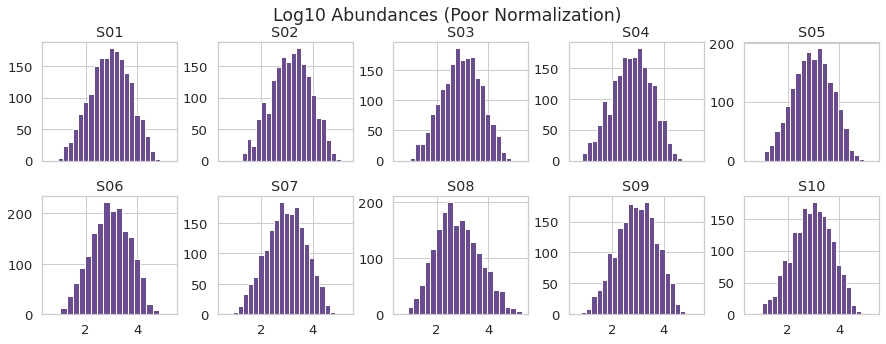

In [31]:
dfDistorted.hist(color = '#6b4a96', bins = 20,
           layout = (2, 5), figsize = (15, 5), sharex = True)
plt.suptitle('Log10 Abundances (Poor Normalization)')

Text(0.5, 1.0, 'Log10 Signal Abundances (Poor Normalization)')

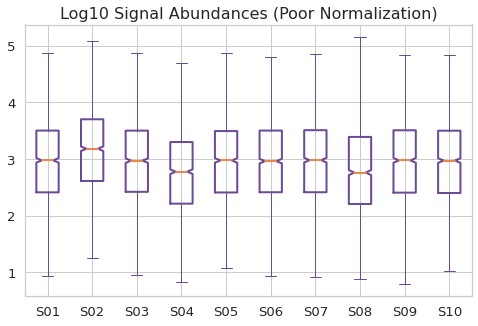

In [33]:
c = '#6b4a96'
dfDistorted.boxplot(
    figsize = (8, 5),
    notch = True, showmeans = False, vert = True,
    showfliers = False,
    boxprops = dict(linewidth = 2, color = c),
    whiskerprops = dict(linewidth = 1, color = c),
    capprops = dict(linewidth = 1, color = c),
    medianprops= dict(linewidth = 2)
)
plt.title('Log10 Signal Abundances (Poor Normalization)', fontsize = 16)

/home/trainee/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


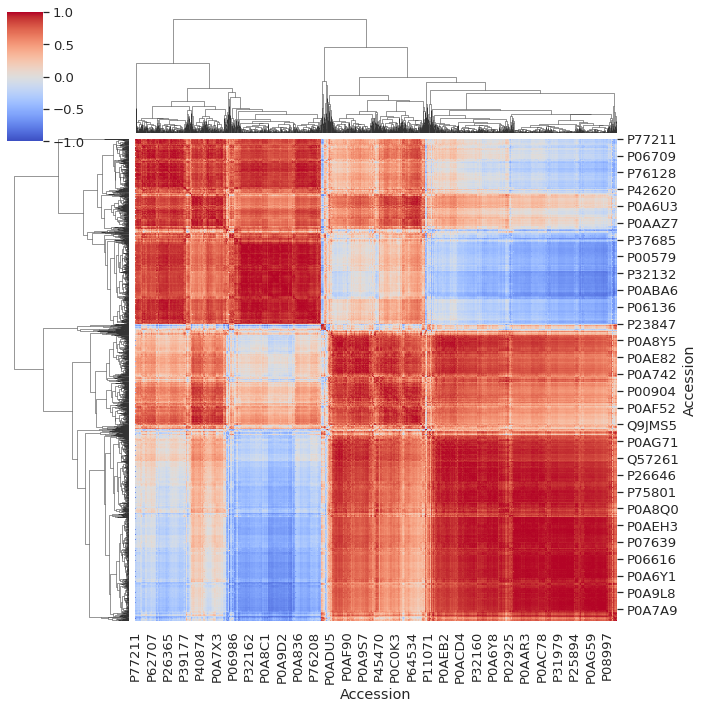

In [34]:
sns.clustermap(
    dfDistorted.T.corr(method='pearson'),
    figsize=(10,10),
    cmap='coolwarm', vmin=-1, vmax=1,
    annot=False, cbar=True, linewidth=0
)

1684530


Text(0.5, 1.0, 'Protein-Protein Correlations (Poor Normalization)')

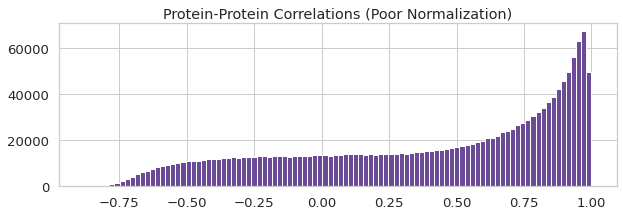

In [35]:
corrArray = dfDistorted.T.corr(method='pearson').to_numpy()
corrArray = corrArray[
    np.triu_indices( corrArray.shape[0], k = 1)
]
print( len(corrArray) )
f = plt.figure(figsize=(10,3))
plt.hist(corrArray, bins=100, color = '#6b4a96')
plt.title('Protein-Protein Correlations (Poor Normalization)')

Scale each row on row mean

In [36]:
dfScaled = dfNum.T.copy()
dfScaled = dfScaled / dfScaled.mean()
dfScaled = dfScaled.T
dfScaled.head(3)

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
Accession,,,,,,,,,,
P0CE48,1.003768,1.018994,1.022287,0.992565,0.968665,0.899495,1.037836,1.015146,1.025727,1.015518
P25665,0.179181,0.192055,0.998309,1.128545,2.180453,2.888115,0.366430,0.381311,0.730864,0.954737
P0A6F5,0.880778,0.894930,1.000671,0.879291,1.220785,0.997524,1.037616,1.010575,1.048057,1.029773


In [37]:
dfScaled.describe()

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,0.991032,1.001991,1.005283,0.993546,1.025193,1.002783,1.010973,1.009044,0.977949,0.982205
std,0.135172,0.139562,0.120810,0.127037,0.265045,0.242137,0.142882,0.123022,0.138901,0.125802
min,0.135990,0.137626,0.151332,0.262343,0.077051,0.259366,0.263810,0.258368,0.149641,0.146808
25%,0.951110,0.965120,0.961981,0.946421,0.918562,0.898048,0.960786,0.967597,0.923286,0.933731
50%,1.006398,1.021845,1.019592,0.994801,0.997069,0.968764,1.012744,1.012354,0.974712,0.975014
75%,1.052887,1.067506,1.067406,1.034114,1.083659,1.053918,1.063889,1.056044,1.026513,1.021966
max,1.922923,2.514236,1.752586,2.225440,4.343867,3.966225,1.858878,1.845639,3.906709,3.948573


In [38]:
dfScaled = np.log10(dfScaled)
dfScaled.head(3)

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
Accession,,,,,,,,,,
P0CE48,0.001633,0.008171,0.009573,-0.003241,-0.013826,-0.046001,0.016129,0.006529,0.011032,0.006687
P25665,-0.746708,-0.716575,-0.000735,0.052519,0.338547,0.460614,-0.436009,-0.418720,-0.136163,-0.020116
P0A6F5,-0.055134,-0.048211,0.000291,-0.055867,0.086639,-0.001077,0.016037,0.004568,0.020385,0.012742


Text(0.5, 0.98, 'Log10 Scaled Abundances')

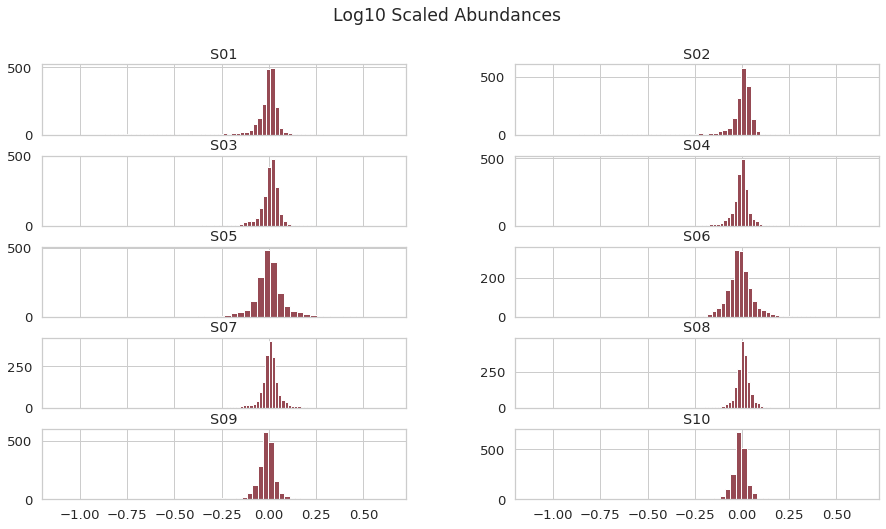

In [50]:
dfScaled.hist(color = '#964a54', bins = 50,
           layout = (5, 2), figsize = (15, 8),
           sharex = True)
plt.suptitle('Log10 Scaled Abundances')

Text(0.5, 1.0, 'Log10 Scaled Abundances')

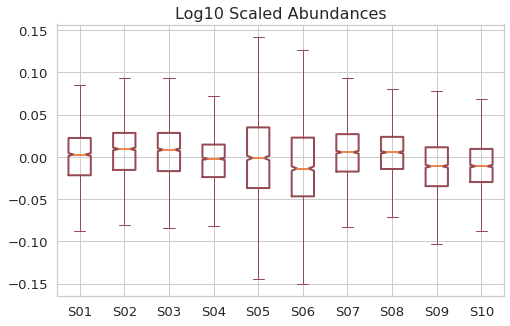

In [56]:
c = '#964a54'
dfScaled.boxplot(
    figsize = (8, 5),
    notch = True, showmeans = False, vert = True,
    showfliers = False,
    boxprops = dict(linewidth = 2, color = c),
    whiskerprops = dict(linewidth = 1, color = c),
    capprops = dict(linewidth = 1, color = c),
    medianprops= dict(linewidth = 2)
)
plt.title('Log10 Scaled Abundances', fontsize = 16)

1684530


Text(0.5, 1.0, 'Protein-Protein Correlations (Scaled Proteins)')

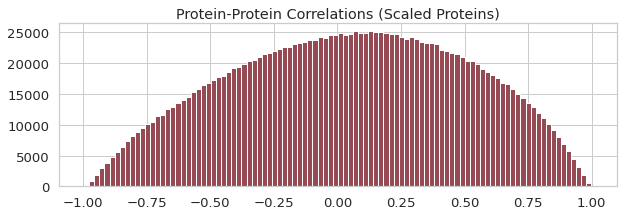

In [57]:
corrArray = dfScaled.T.corr(method='pearson').to_numpy()
corrArray = corrArray[
    np.triu_indices( corrArray.shape[0], k = 1)
]
print( len(corrArray) )
f = plt.figure(figsize=(10,3))
plt.hist(corrArray, bins=100, color = '#964a54')
plt.title('Protein-Protein Correlations (Scaled Proteins)')

<h3>Look at sample-sample correlations</h3>

Text(0.5, 0.98, 'Sample-Sample Correlations on Abundances')

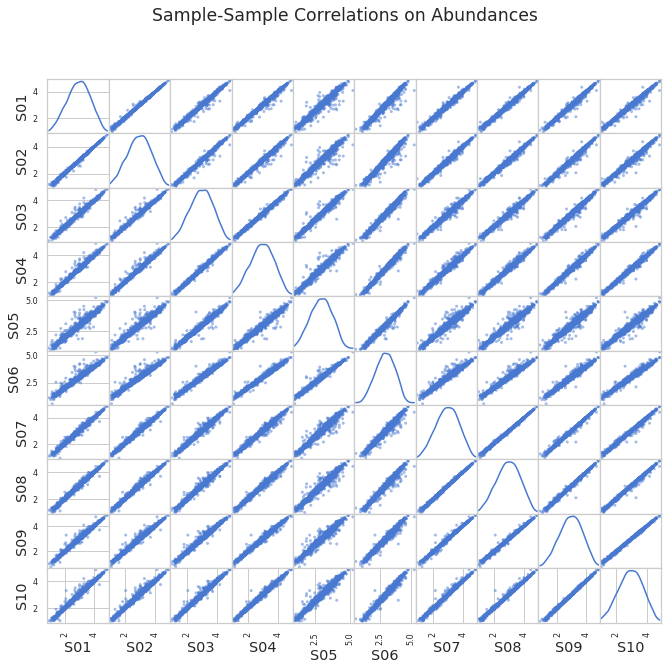

In [41]:
pd.plotting.scatter_matrix(
    dfLog, figsize = (11, 10), diagonal = 'kde'
)
plt.suptitle('Sample-Sample Correlations on Abundances')

In [42]:
dfLog.corr(method='pearson')

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
S01,1.000000,0.998320,0.993210,0.993342,0.977418,0.981392,0.993984,0.994970,0.992913,0.991946
S02,0.998320,1.000000,0.994048,0.992826,0.978177,0.981378,0.993799,0.994392,0.991564,0.990705
S03,0.993210,0.994048,1.000000,0.996395,0.988439,0.989312,0.990351,0.991751,0.991248,0.992023
S04,0.993342,0.992826,0.996395,1.000000,0.983921,0.991725,0.991334,0.993481,0.993494,0.994664
S05,0.977418,0.978177,0.988439,0.983921,1.000000,0.990803,0.978874,0.979380,0.980358,0.982242
S06,0.981392,0.981378,0.989312,0.991725,0.990803,1.000000,0.983281,0.985681,0.986747,0.989103
S07,0.993984,0.993799,0.990351,0.991334,0.978874,0.983281,1.000000,0.998579,0.996192,0.995529
S08,0.994970,0.994392,0.991751,0.993481,0.979380,0.985681,0.998579,1.000000,0.996851,0.996522
S09,0.992913,0.991564,0.991248,0.993494,0.980358,0.986747,0.996192,0.996851,1.000000,0.998612
S10,0.991946,0.990705,0.992023,0.994664,0.982242,0.989103,0.995529,0.996522,0.998612,1.000000


Text(0.5, 0.98, 'Sample-Sample Correlations on Abundances')

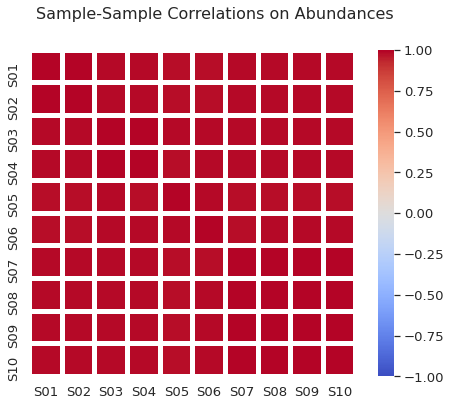

In [43]:
f = plt.figure(figsize=(8,6))
sns.heatmap(
    dfLog.corr(method='pearson').round(2),
    square=True, cmap='coolwarm', vmin=-1, vmax=1,
    annot=False, cbar=True, linewidth=4, linecolor='white'
)
plt.suptitle('Sample-Sample Correlations on Abundances',fontsize=16)

Now let's check how the sample-sample correlations would look on the scaled values

Text(0.5, 0.98, 'Sample-Sample Correlations on Scaled Abundances')

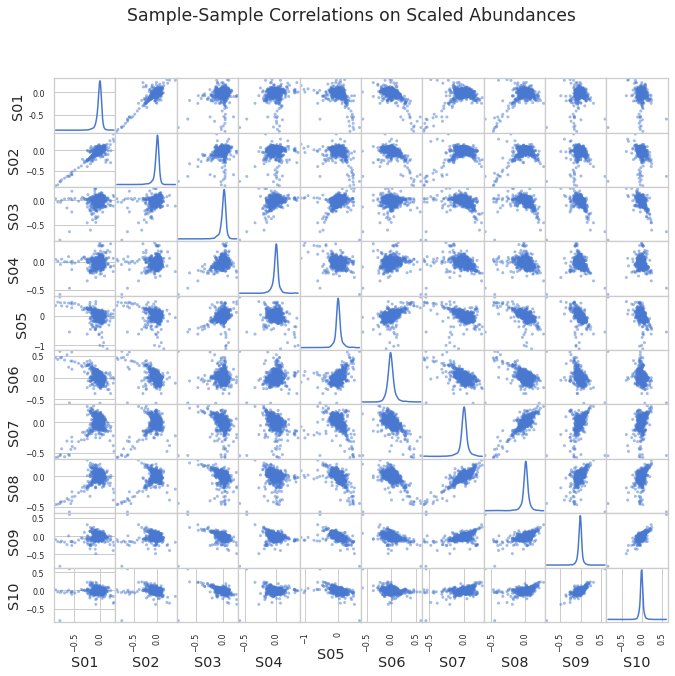

In [44]:
pd.plotting.scatter_matrix(
    dfScaled, figsize = (11, 10), diagonal = 'kde'
)
plt.suptitle('Sample-Sample Correlations on Scaled Abundances')

Text(0.5, 0.98, 'Sample-Sample Correlations on Scaled Abundances')

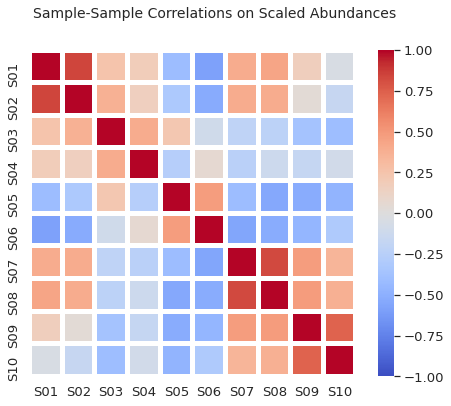

In [45]:
f = plt.figure(figsize=(8,6))
sns.heatmap(
    dfScaled.corr(method='pearson').round(2),
    square=True, cmap='coolwarm', vmin=-1, vmax=1,
    annot=False, cbar=True, linewidth=4, linecolor='white'
)
plt.suptitle('Sample-Sample Correlations on Scaled Abundances',fontsize=14)

Scale on sample S01

In [63]:
dfScaledOnS1 = dfNum.T.copy()
dfScaledOnS1 = dfScaledOnS1 / dfScaledOnS1.loc['S01']
dfScaledOnS1 = dfScaledOnS1.T
dfScaledOnS1.head(3)

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
Accession,,,,,,,,,,
P0CE48,1.0,1.015168,1.018449,0.988838,0.965028,0.896118,1.033940,1.011335,1.021876,1.011705
P25665,1.0,1.071846,5.571512,6.298352,12.168997,16.118421,2.045025,2.128079,4.078915,5.328336
P0A6F5,1.0,1.016067,1.136122,0.998312,1.386031,1.132549,1.178068,1.147366,1.189922,1.169164


In [72]:
dfScaledOnS1 = np.log10(dfScaledOnS1)
dfScaledOnS1.head(3)

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
Accession,,,,,,,,,,
P0CE48,0.0,0.006538,0.007939,-0.004875,-0.015460,-0.047635,0.014495,0.004895,0.009398,0.005054
P25665,0.0,0.030133,0.745973,0.799227,1.085255,1.207322,0.310699,0.327988,0.610545,0.726592
P0A6F5,0.0,0.006923,0.055425,-0.000734,0.141773,0.054057,0.071170,0.059702,0.075518,0.067875


Text(0.5, 0.98, 'Sample-Sample Correlations / Abundances Scaled on S01')

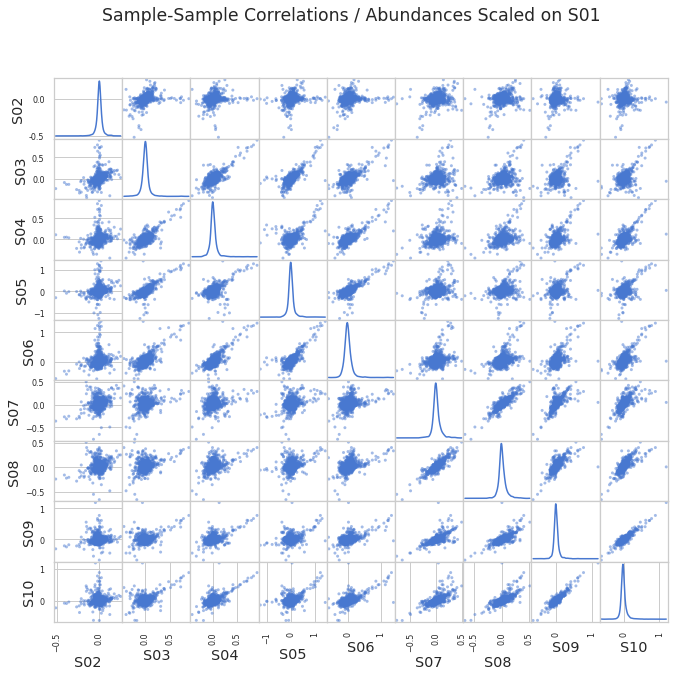

In [74]:
pd.plotting.scatter_matrix(
    dfScaledOnS1.iloc[:,1:],
    figsize = (11, 10), diagonal = 'kde'
)
plt.suptitle('Sample-Sample Correlations / Abundances Scaled on S01')

Text(0.5, 0.98, 'Sample-Sample Correlations / Abundances Scaled on S01')

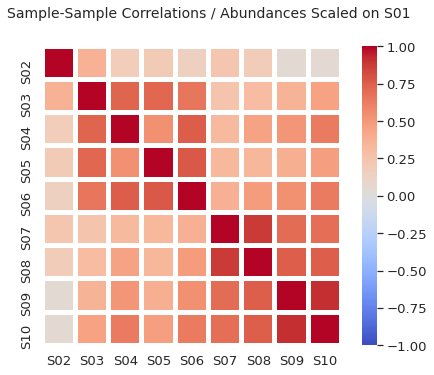

In [80]:
f = plt.figure(figsize=(7.5,5.5))
sns.heatmap(
    dfScaledOnS1.iloc[:,1:].corr(method='pearson').round(2),
    square=True, cmap='coolwarm', vmin=-1, vmax=1,
    annot=False, cbar=True, linewidth=4, linecolor='white'
)
plt.suptitle('Sample-Sample Correlations / Abundances Scaled on S01',fontsize=14)